**Car price Prediction**
*Problem Statement*-Apply analytics on TrainData and apply the model on TestData to predict the car price.

**Import Libraraies**



In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train= pd.read_csv('/content/CarPrice_Assignment_train_unclean.csv')
test = pd.read_csv('/content/CarPrice_Assignment_test.csv')

In [4]:
data=[train,test]


In [5]:
train.head

<bound method NDFrame.head of      symboling                   CarName fueltype  ... citympg highwaympg    price
0            2               audi 100 ls      gas  ...    24.0       30.0  13950.0
1            0               peugeot 504      gas  ...    19.0       24.0  16695.0
2            3      mitsubishi outlander      gas  ...    19.0       24.0  12629.0
3            1             toyota corona      gas  ...    31.0       38.0   6338.0
4            2           toyota cressida      gas  ...    24.0       30.0  17669.0
..         ...                       ...      ...  ...     ...        ...      ...
148          0                 jaguar xf      NaN  ...    15.0       19.0  35550.0
149          1  plymouth fury gran sedan      gas  ...    31.0       38.0   7609.0
150          0  volkswagen rabbit custom   diesel  ...    33.0       38.0  13845.0
151          2            toyota corolla      gas  ...    24.0       30.0  11549.0
152          0             mazda rx-7 gs   diesel  ...   

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         153 non-null    int64  
 1   CarName           153 non-null    object 
 2   fueltype          150 non-null    object 
 3   aspiration        151 non-null    object 
 4   doornumber        152 non-null    object 
 5   carbody           153 non-null    object 
 6   drivewheel        153 non-null    object 
 7   enginelocation    142 non-null    object 
 8   wheelbase         151 non-null    float64
 9   carlength         150 non-null    float64
 10  carwidth          149 non-null    float64
 11  carheight         151 non-null    float64
 12  curbweight        152 non-null    float64
 13  enginetype        153 non-null    object 
 14  cylindernumber    152 non-null    object 
 15  enginesize        153 non-null    int64  
 16  fuelsystem        153 non-null    object 
 1

In [7]:
test.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,saab 99e,gas,turbo,four,sedan,fwd,front,99.1,186.6,66.5,56.1,2847,dohc,four,121,mpfi,3.54,3.07,9.0,160,5500,19,26,NaN
1,3,saab 99le,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2707,ohc,four,121,mpfi,2.54,2.07,9.3,110,5250,21,28,NaN
2,2,subaru dl,gas,std,two,hatchback,fwd,front,93.7,157.9,63.6,53.7,2120,ohcf,four,108,2bbl,3.62,2.64,8.7,73,4400,26,31,NaN
3,1,nissan juke,gas,std,two,hatchback,fwd,front,94.5,165.6,63.8,53.3,2028,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,NaN
4,1,toyota celica gt liftback,gas,std,two,sedan,rwd,front,94.5,168.7,64.0,52.6,2265,dohc,four,98,mpfi,3.24,3.08,9.4,112,6600,26,29,NaN


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         52 non-null     int64  
 1   CarName           52 non-null     object 
 2   fueltype          52 non-null     object 
 3   aspiration        52 non-null     object 
 4   doornumber        52 non-null     object 
 5   carbody           52 non-null     object 
 6   drivewheel        52 non-null     object 
 7   enginelocation    52 non-null     object 
 8   wheelbase         52 non-null     float64
 9   carlength         52 non-null     float64
 10  carwidth          52 non-null     float64
 11  carheight         52 non-null     float64
 12  curbweight        52 non-null     int64  
 13  enginetype        52 non-null     object 
 14  cylindernumber    52 non-null     object 
 15  enginesize        52 non-null     int64  
 16  fuelsystem        52 non-null     object 
 17 

In [9]:
test.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,0.0
mean,0.961538,97.982692,173.055769,65.646154,53.428846,2504.711538,124.730769,3.287885,3.220481,9.692308,107.730769,5221.153846,24.442308,30.288462,NaN
std,1.203940,4.865756,10.559828,2.332672,2.199228,460.929297,40.850332,0.282859,0.326350,3.152021,44.097092,538.365915,5.337303,5.675322,NaN
min,-1.000000,88.600000,157.300000,61.800000,47.800000,1876.000000,70.000000,2.540000,2.070000,7.000000,62.000000,4200.000000,13.000000,17.000000,NaN
25%,0.000000,94.500000,165.675000,63.950000,52.000000,2202.000000,97.750000,3.150000,3.077500,8.700000,75.250000,4800.000000,19.750000,26.000000,NaN
50%,1.000000,96.500000,172.800000,65.300000,54.000000,2408.500000,110.000000,3.215000,3.272500,9.000000,101.500000,5200.000000,24.000000,29.000000,NaN
75%,2.000000,99.650000,176.800000,66.500000,54.900000,2775.750000,140.250000,3.550000,3.402500,9.400000,120.250000,5500.000000,27.000000,33.250000,NaN
max,3.000000,115.600000,202.600000,72.300000,59.100000,3950.000000,326.000000,3.940000,3.860000,23.000000,288.000000,6600.000000,38.000000,47.000000,NaN


In [10]:
train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,153.000000,151.000000,150.000000,149.000000,151.000000,152.000000,153.000000,151.000000,150.000000,151.000000,153.000000,146.000000,150.000000,150.000000,153.000000
mean,0.790850,98.970199,174.342667,65.997987,53.774172,2574.019737,127.647059,3.342185,3.267167,10.217351,102.888889,5096.232877,25.360000,30.960000,13364.157954
std,1.259979,6.384991,12.971747,2.077826,2.493791,541.390991,42.015265,0.266828,0.310188,4.110621,37.950895,456.186804,6.794471,7.259227,8302.558158
min,-2.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.910000,2.190000,7.000000,48.000000,4150.000000,14.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.925000,64.200000,52.000000,2143.750000,97.000000,3.140000,3.127500,8.500000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.600000,54.100000,2434.000000,120.000000,3.350000,3.290000,9.000000,95.000000,5100.000000,25.000000,31.000000,10698.000000
75%,2.000000,102.800000,184.600000,67.200000,55.700000,3036.000000,145.000000,3.595000,3.410000,9.405000,116.000000,5400.000000,30.000000,36.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,308.000000,3.940000,4.170000,23.000000,207.000000,6000.000000,49.000000,54.000000,45400.000000


**Data Cleaning**

In [11]:
#Splitting company name from CarName column
CompanyName = train['CarName'].apply(lambda x : x.split(' ')[0])
train.insert(3,"CompanyName",CompanyName)
train.drop(['CarName'],axis=1,inplace=True)
train.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0
1,0,gas,peugeot,std,four,wagon,rwd,front,114.2,198.9,68.4,56.7,3285.0,l,four,120,mpfi,3.46,2.19,8.4,95,5000.0,19.0,24.0,16695.0
2,3,gas,mitsubishi,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2833.0,ohc,four,156,spdi,3.58,3.86,7.0,145,5000.0,19.0,24.0,12629.0
3,1,gas,toyota,std,two,hatchback,fwd,front,95.7,158.7,63.6,54.5,2040.0,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800.0,31.0,38.0,6338.0
4,2,gas,toyota,std,two,convertible,rwd,front,98.4,176.2,65.6,53.0,2975.0,ohc,four,146,mpfi,3.62,3.50,9.3,116,NaN,24.0,30.0,17669.0


In [12]:
#Splitting company name from CarName column
CompanyName = test['CarName'].apply(lambda x : x.split(' ')[0])
test.insert(3,"CompanyName",CompanyName)
test.drop(['CarName'],axis=1,inplace=True)
test.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,gas,saab,turbo,four,sedan,fwd,front,99.1,186.6,66.5,56.1,2847,dohc,four,121,mpfi,3.54,3.07,9.0,160,5500,19,26,NaN
1,3,gas,saab,std,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2707,ohc,four,121,mpfi,2.54,2.07,9.3,110,5250,21,28,NaN
2,2,gas,subaru,std,two,hatchback,fwd,front,93.7,157.9,63.6,53.7,2120,ohcf,four,108,2bbl,3.62,2.64,8.7,73,4400,26,31,NaN
3,1,gas,nissan,std,two,hatchback,fwd,front,94.5,165.6,63.8,53.3,2028,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,NaN
4,1,gas,toyota,std,two,sedan,rwd,front,94.5,168.7,64.0,52.6,2265,dohc,four,98,mpfi,3.24,3.08,9.4,112,6600,26,29,NaN


In [13]:
train.CompanyName.unique()

array(['audi', 'peugeot', 'mitsubishi', 'toyota', 'subaru', 'porsche',
       'volvo', 'maxda', 'jaguar', 'mazda', 'bmw', 'volkswagen', 'nissan',
       'honda', 'alfa-romero', 'dodge', 'porcshce', 'vokswagen',
       'toyouta', 'buick', 'chevrolet', 'plymouth', 'mercury', 'saab',
       'renault', 'isuzu', 'Nissan'], dtype=object)

In [14]:
train.CompanyName = train.CompanyName.str.lower()

def replace_name(a,b):
    train.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')

train.CompanyName.unique()

array(['audi', 'peugeot', 'mitsubishi', 'toyota', 'subaru', 'porsche',
       'volvo', 'mazda', 'jaguar', 'bmw', 'volkswagen', 'nissan', 'honda',
       'alfa-romero', 'dodge', 'buick', 'chevrolet', 'plymouth',
       'mercury', 'saab', 'renault', 'isuzu'], dtype=object)

In [15]:
test.CompanyName = test.CompanyName.str.lower()

def replace_name(a,b):
    test.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

test.CompanyName.unique()

array(['saab', 'subaru', 'nissan', 'toyota', 'volkswagen', 'plymouth',
       'alfa-romero', 'dodge', 'buick', 'audi', 'jaguar', 'porsche',
       'mitsubishi', 'volvo', 'isuzu', 'mazda', 'bmw', 'honda'],
      dtype=object)

In [16]:
train.columns

Index(['symboling', 'fueltype', 'CompanyName', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [17]:
test.columns

Index(['symboling', 'fueltype', 'CompanyName', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

**EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


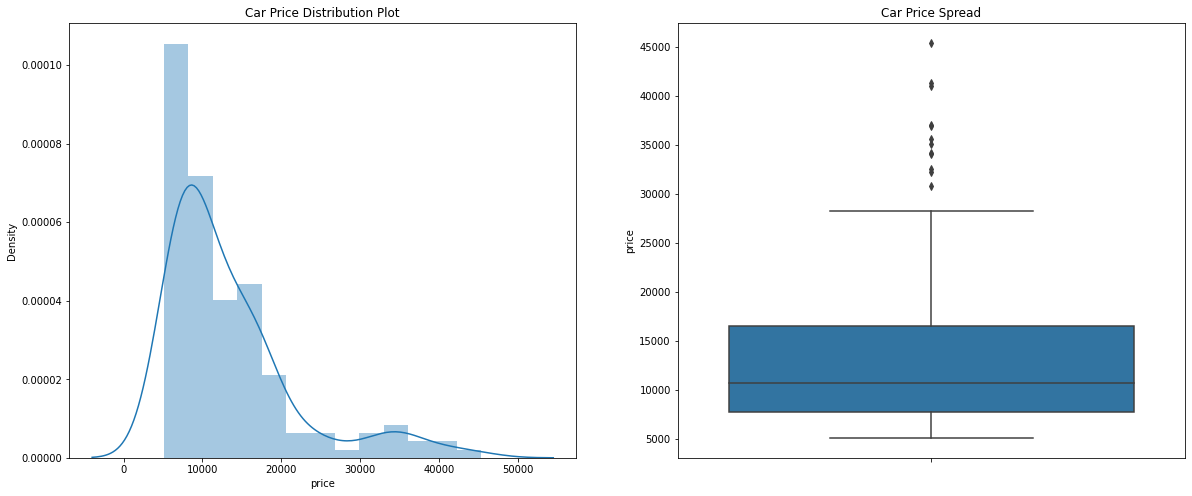

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(train.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=train.price)

plt.show()

In [19]:
print(train.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      153.000000
mean     13364.157954
std       8302.558158
min       5118.000000
25%       7775.000000
50%      10698.000000
75%      16500.000000
85%      18403.200000
90%      23625.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
There is a significant difference between the mean and the median of the price distribution.
The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,403, whereas the remaining 15% are between 18,500 and 45,400.)

```
# This is formatted as code
```



In [20]:
cat = ["CompanyName",'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
print('No. of categorical columns are:',len(cat))

No. of categorical columns are: 10


In [21]:
num = []
for i in train.columns:
    if i not in cat:
        num.append(i)
print('No. of numerical/float columns are:',len(num))

No. of numerical/float columns are: 15


**Visualising Categorical Data**

- CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

In [22]:
train['symboling']=train['symboling'].astype('object').astype('category')


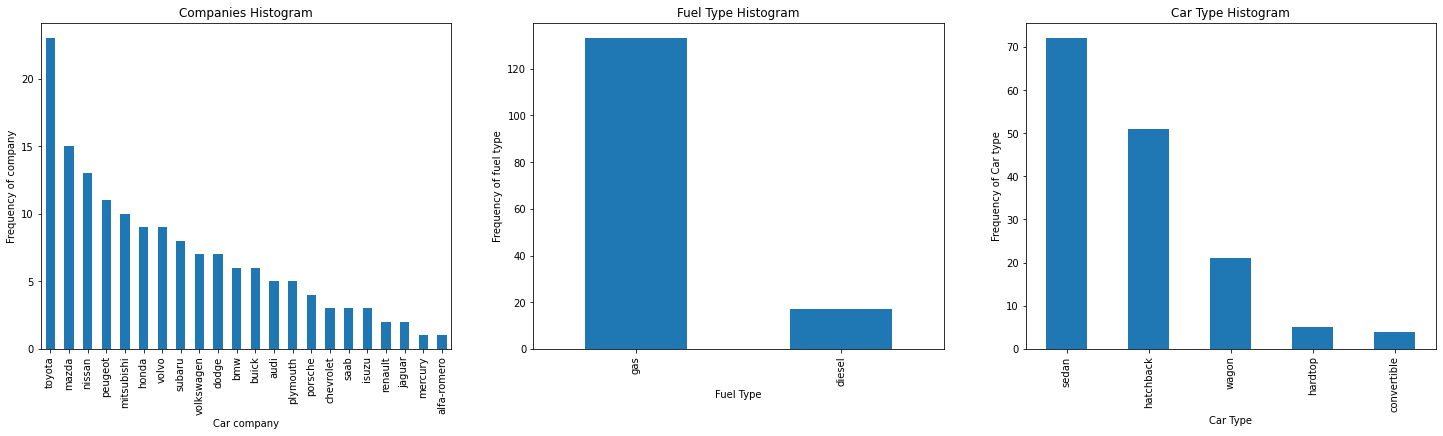

In [23]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = train.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = train.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = train.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()


Toyota seemed to be favored car company.
Number of gas fueled cars are more than diesel.
sedan is the top car type prefered.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


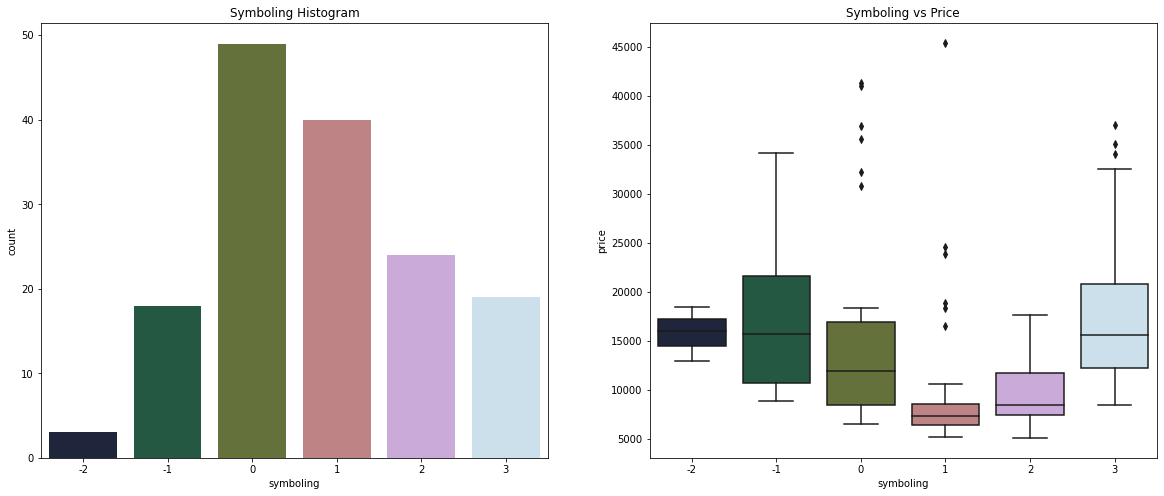

In [24]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(train.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=train.symboling, y=train.price, palette=("cubehelix"))

plt.show()

It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
The cars with -1 symboling seems to be high priced. But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


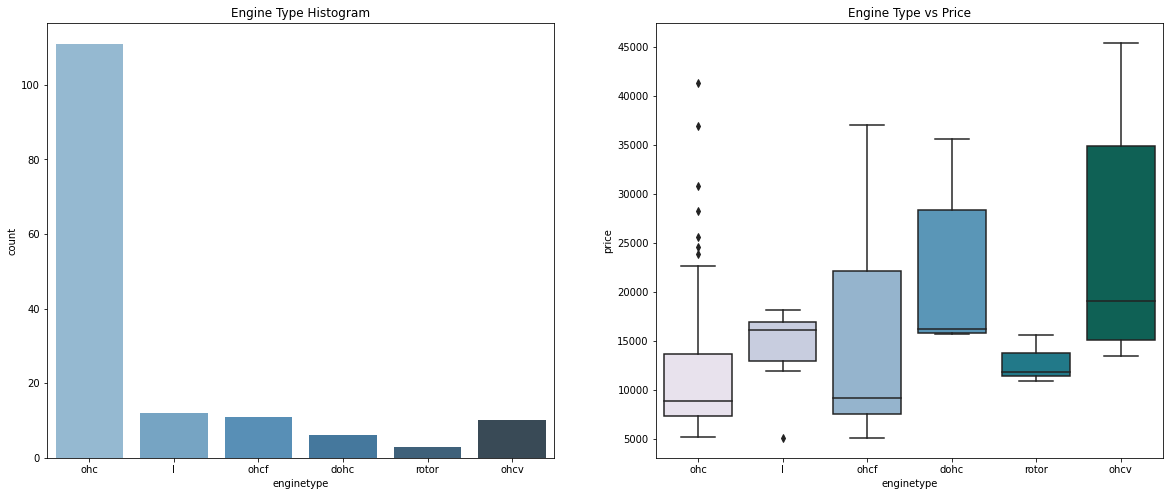

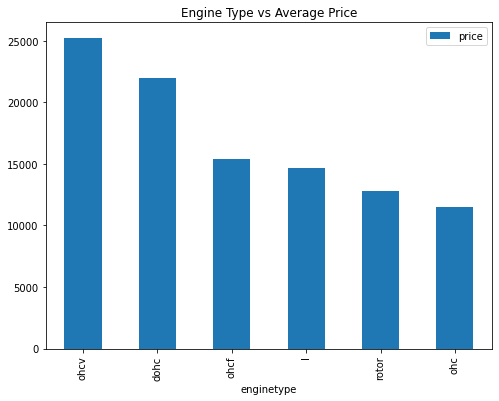

In [25]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(train.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=train.enginetype, y=train.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(train.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

ohc Engine type seems to be most favored type.
ohcv has the highest price range 

<Figure size 1800x432 with 0 Axes>

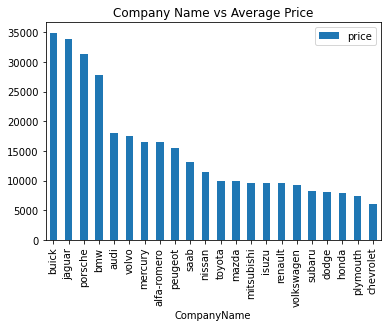

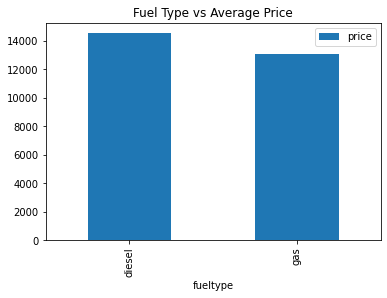

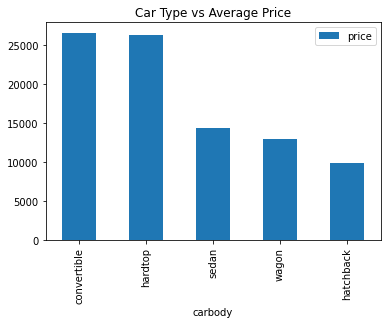

In [26]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(train.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(train.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(train.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

Jaguar and Buick seem to have highest average price.
diesel has higher average price than gas.
hardtop and convertible have higher average price.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


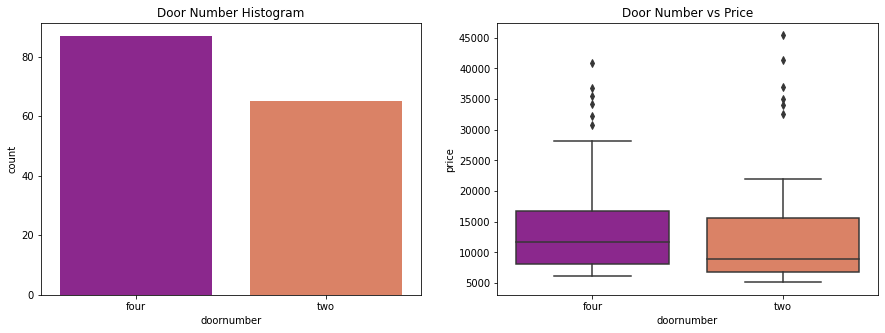

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


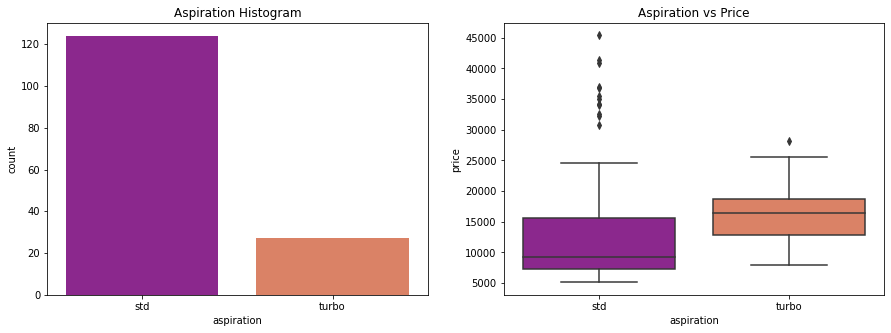

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(train.doornumber, palette=("plasma"))
plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=train.doornumber, y=train.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(train.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=train.aspiration, y=train.price, palette=("plasma"))

plt.show()

doornumber variable is lightly affacting the price.
It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

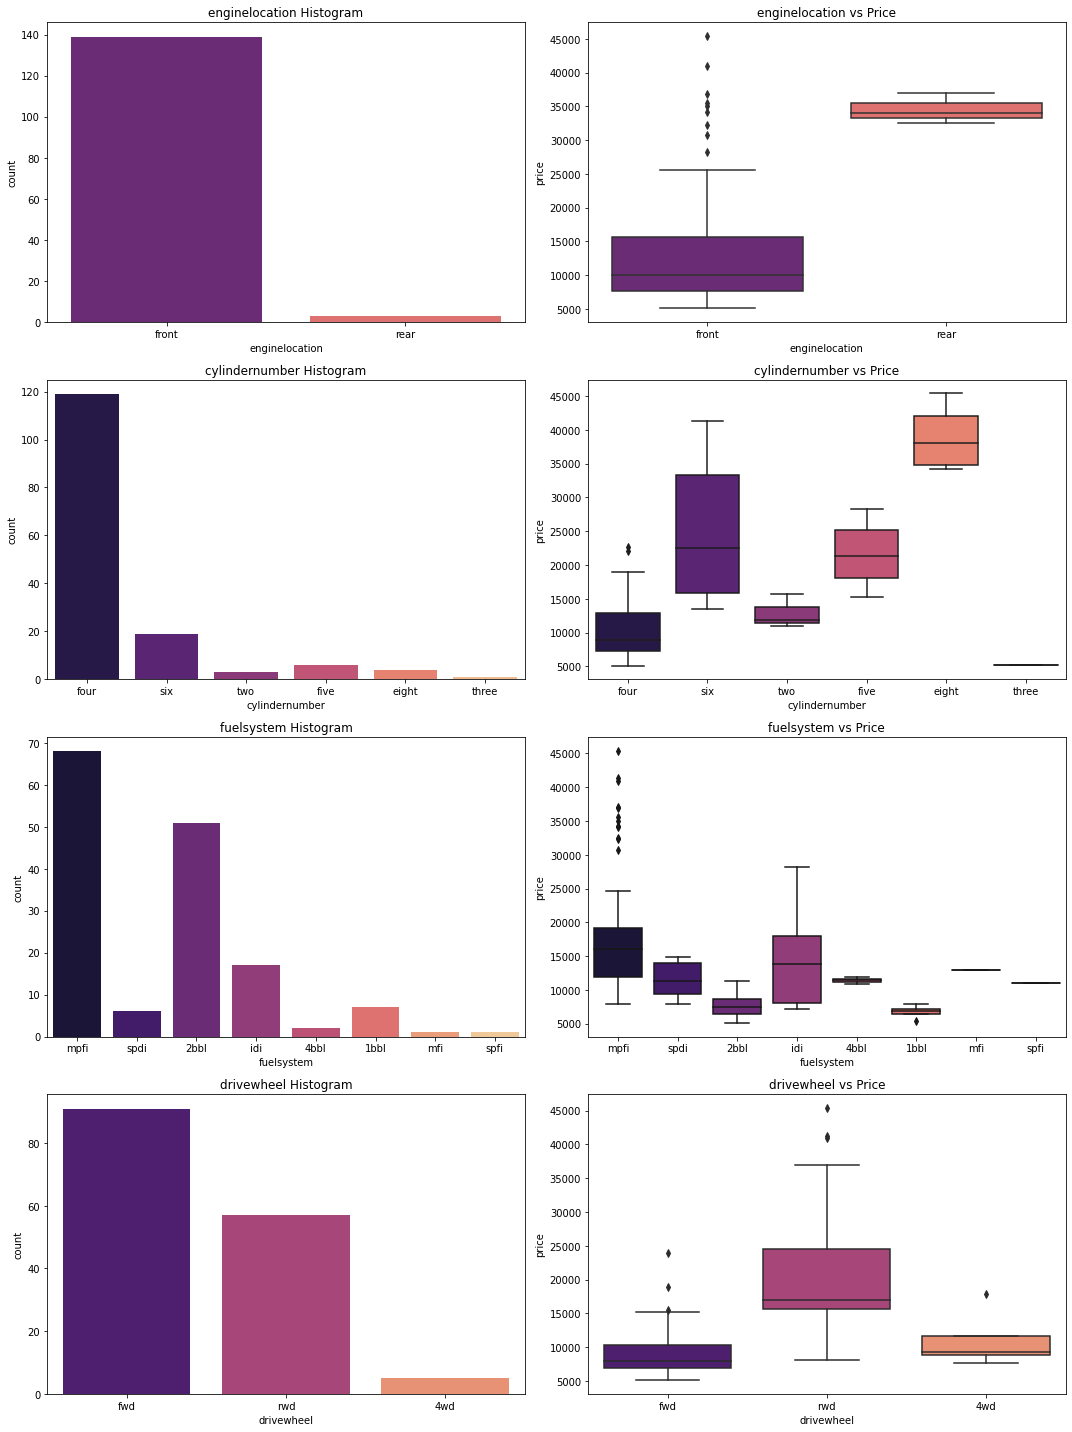

In [28]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(train[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=train[x], y=train.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

Very few datapoints for enginelocation categories to make an inference.
Most common number of cylinders are six and five. Though eight cylinders have the highest price range.
mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

**Visualising numerical data**

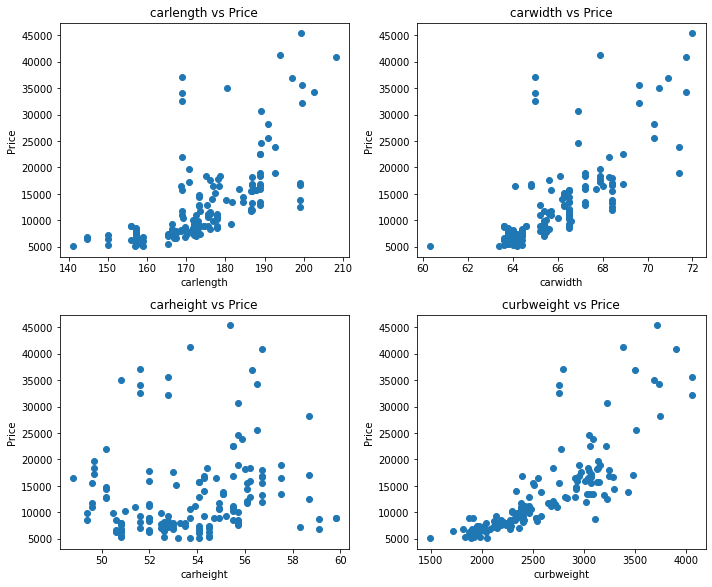

In [29]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(train[x],train['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

carwidth, carlength and curbweight seems to have a poitive correlation with price.
carheight doesn't show any significant trend with price.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


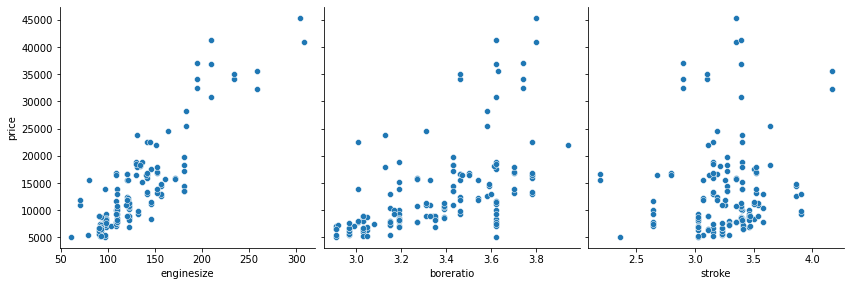

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


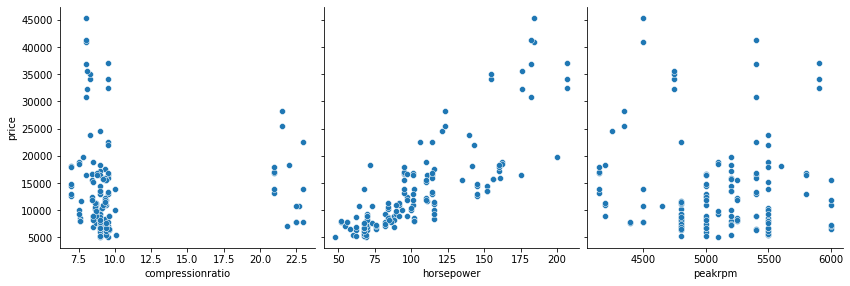

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


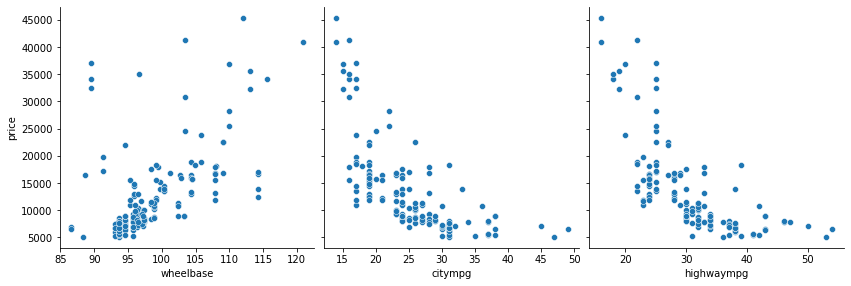

In [30]:
def pp(x,y,z):
    sns.pairplot(train, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
citympg, highwaympg - seem to have a significant negative correlation with price.

Bivariate Analysis

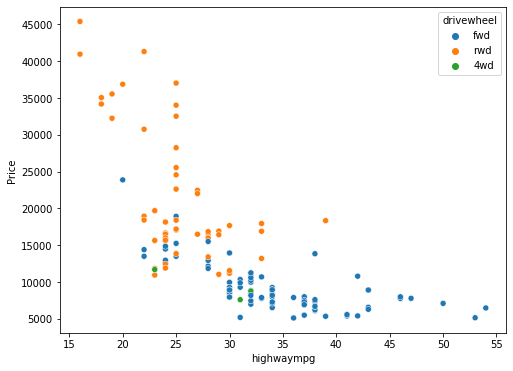

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(figsize=(8,6))


sns.scatterplot(x=train['highwaympg'],y=train['price'],hue=train['drivewheel'])
plt.xlabel('highwaympg')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

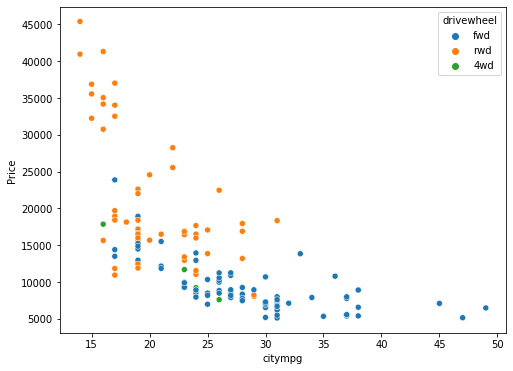

<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure(figsize=(8,6))


sns.scatterplot(x=train['citympg'],y=train['price'],hue=train['drivewheel'])
plt.xlabel('citympg')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

In [33]:
#Fuel economy
train['fueleconomy'] = (0.55 * train['citympg']) + (0.45 * train['highwaympg'])

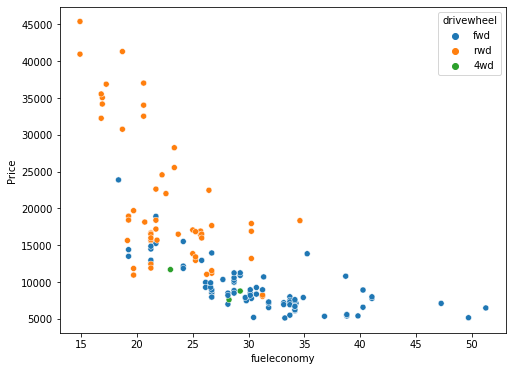

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize=(8,6))


sns.scatterplot(x=train['fueleconomy'],y=train['price'],hue=train['drivewheel'])
plt.xlabel('fueleconomy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.

List of significant variables after Visual analysis :
- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 

In [35]:
train.isnull().sum()

symboling            0
fueltype             3
CompanyName          0
aspiration           2
doornumber           1
carbody              0
drivewheel           0
enginelocation      11
wheelbase            2
carlength            3
carwidth             4
carheight            2
curbweight           1
enginetype           0
cylindernumber       1
enginesize           0
fuelsystem           0
boreratio            2
stroke               3
compressionratio     2
horsepower           0
peakrpm              7
citympg              3
highwaympg           3
price                0
fueleconomy          6
dtype: int64

In [36]:
df=train.copy()

In [37]:
from sklearn.impute import SimpleImputer
imp1=SimpleImputer(missing_values=np.nan , strategy="median")
train["wheelbase"]=imp1.fit_transform(train[["wheelbase"]])
train["carlength"]=imp1.fit_transform(train[["carlength"]])
train["carwidth"]=imp1.fit_transform(train[["carwidth"]])
train["boreratio"]=imp1.fit_transform(train[["boreratio"]])
train["fueleconomy"]=imp1.fit_transform(train[["fueleconomy"]])

imp2=SimpleImputer(missing_values=np.nan , strategy="most_frequent")
train["fueltype"]=imp2.fit_transform(train[["fueltype"]])
train["aspiration"]=imp2.fit_transform(train[["aspiration"]])


In [38]:
train=train.dropna()

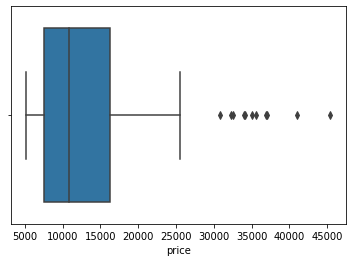

In [39]:
sns.boxplot(x=train["price"],data=train)

In [40]:
train.isnull().sum()

symboling           0
fueltype            0
CompanyName         0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
fueleconomy         0
dtype: int64

In [41]:
train.shape

(123, 26)

In [42]:
train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,98.865854,174.401626,66.007317,53.619512,2560.357724,128.520325,3.339919,3.289228,10.140000,104.252033,5109.756098,25.325203,30.796748,13490.069106,27.787398
std,6.464085,13.144094,2.084021,2.522023,537.923743,43.756470,0.270663,0.296367,4.006105,38.491769,457.973912,6.907463,7.188287,8509.150372,6.990578
min,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.910000,2.190000,7.000000,48.000000,4150.000000,14.000000,16.000000,5151.000000,14.900000
25%,94.500000,167.050000,64.400000,51.600000,2142.500000,98.000000,3.150000,3.150000,8.500000,70.000000,4800.000000,19.000000,25.000000,7606.000000,21.700000
50%,97.000000,173.200000,65.600000,54.100000,2425.000000,120.000000,3.330000,3.290000,9.000000,95.000000,5100.000000,25.000000,31.000000,10795.000000,26.700000
75%,102.550000,185.600000,66.750000,55.700000,2943.500000,143.000000,3.590000,3.410000,9.405000,116.000000,5500.000000,30.000000,35.000000,16249.000000,32.475000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,308.000000,3.940000,4.170000,23.000000,207.000000,6000.000000,49.000000,54.000000,45400.000000,51.250000


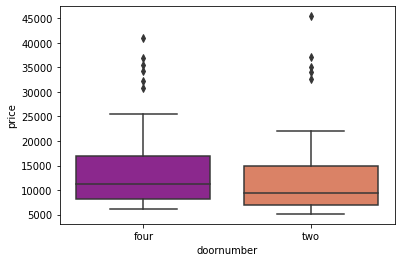

In [43]:
sns.boxplot(x=train.doornumber, y=train.price, palette=("plasma"))



In [44]:
cars =train [['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth']]
cars.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
0,13950.0,gas,std,sedan,fwd,99.8,2337.0,ohc,four,109,3.19,102,26.70,176.6,66.2
1,16695.0,gas,std,wagon,rwd,114.2,3285.0,l,four,120,3.46,95,21.25,198.9,68.4
2,12629.0,gas,turbo,hatchback,fwd,95.9,2833.0,ohc,four,156,3.58,145,21.25,173.2,66.3
3,6338.0,gas,std,hatchback,fwd,95.7,2040.0,ohc,four,92,3.05,62,34.15,158.7,63.6
6,9960.0,gas,std,sedan,fwd,97.2,2340.0,ohcf,four,108,3.62,94,28.70,172.0,65.4


In [45]:
cars.shape

(123, 15)

In [46]:
#print(cars.horsepower.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))
cars.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,13490.069106,98.865854,2560.357724,128.520325,3.339919,104.252033,27.787398,174.401626,66.007317
std,8509.150372,6.464085,537.923743,43.756470,0.270663,38.491769,6.990578,13.144094,2.084021
min,5151.000000,86.600000,1488.000000,61.000000,2.910000,48.000000,14.900000,141.100000,60.300000
25%,7606.000000,94.500000,2142.500000,98.000000,3.150000,70.000000,21.700000,167.050000,64.400000
50%,10795.000000,97.000000,2425.000000,120.000000,3.330000,95.000000,26.700000,173.200000,65.600000
75%,16249.000000,102.550000,2943.500000,143.000000,3.590000,116.000000,32.475000,185.600000,66.750000
max,45400.000000,120.900000,4066.000000,308.000000,3.940000,207.000000,51.250000,208.100000,72.000000


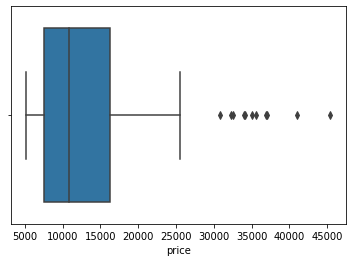

In [47]:
sns.boxplot(x=cars["price"],data=cars)

In [48]:


q1=cars.price.quantile(0.25)
q3=cars.price.quantile(0.75)
IQR=q3-q1
lower_limit,upper_limit=q1-1.5*IQR,q3+1.5*IQR

In [49]:
cars[((cars.price<lower_limit) | (cars.price>upper_limit))]

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
7,37028.0,gas,std,convertible,rwd,89.5,2800.0,ohcf,six,194,3.74,207,20.60,168.9,65.0
13,32250.0,gas,std,sedan,rwd,113.0,4066.0,dohc,six,258,3.35,176,16.80,199.6,69.6
15,36880.0,gas,std,sedan,rwd,110.0,3505.0,ohc,six,209,3.62,182,17.25,197.0,70.9
39,34028.0,gas,std,hardtop,rwd,89.5,2756.0,ohcf,six,194,3.74,207,20.60,168.9,65.0
43,32528.0,gas,std,hardtop,rwd,89.5,2756.0,ohcf,six,194,3.74,207,20.60,168.9,65.0
53,40960.0,gas,std,sedan,rwd,120.9,3900.0,ohcv,eight,308,3.80,184,14.90,208.1,71.7
69,34184.0,gas,std,sedan,rwd,115.6,3740.0,ohcv,eight,234,3.46,155,16.90,202.6,71.7
71,45400.0,gas,std,hardtop,rwd,112.0,3715.0,ohcv,eight,304,3.80,184,14.90,199.2,72.0
81,30760.0,gas,std,sedan,rwd,103.5,3230.0,ohc,six,209,3.62,182,18.70,189.0,66.9
133,35056.0,gas,std,convertible,rwd,96.6,3685.0,ohcv,eight,234,3.46,155,16.90,180.3,70.5


In [50]:
#as visualized every outliers in other varaibles have price range above outliers of price
cars2=cars[~((cars.price<lower_limit) | (cars.price>upper_limit))]

In [51]:
cars2.shape

(112, 15)

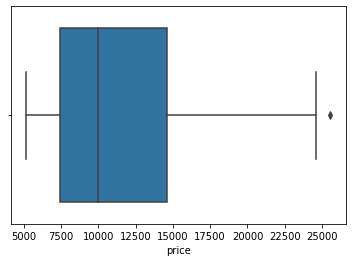

In [52]:
sns.boxplot(x=cars2["price"],data=cars2)

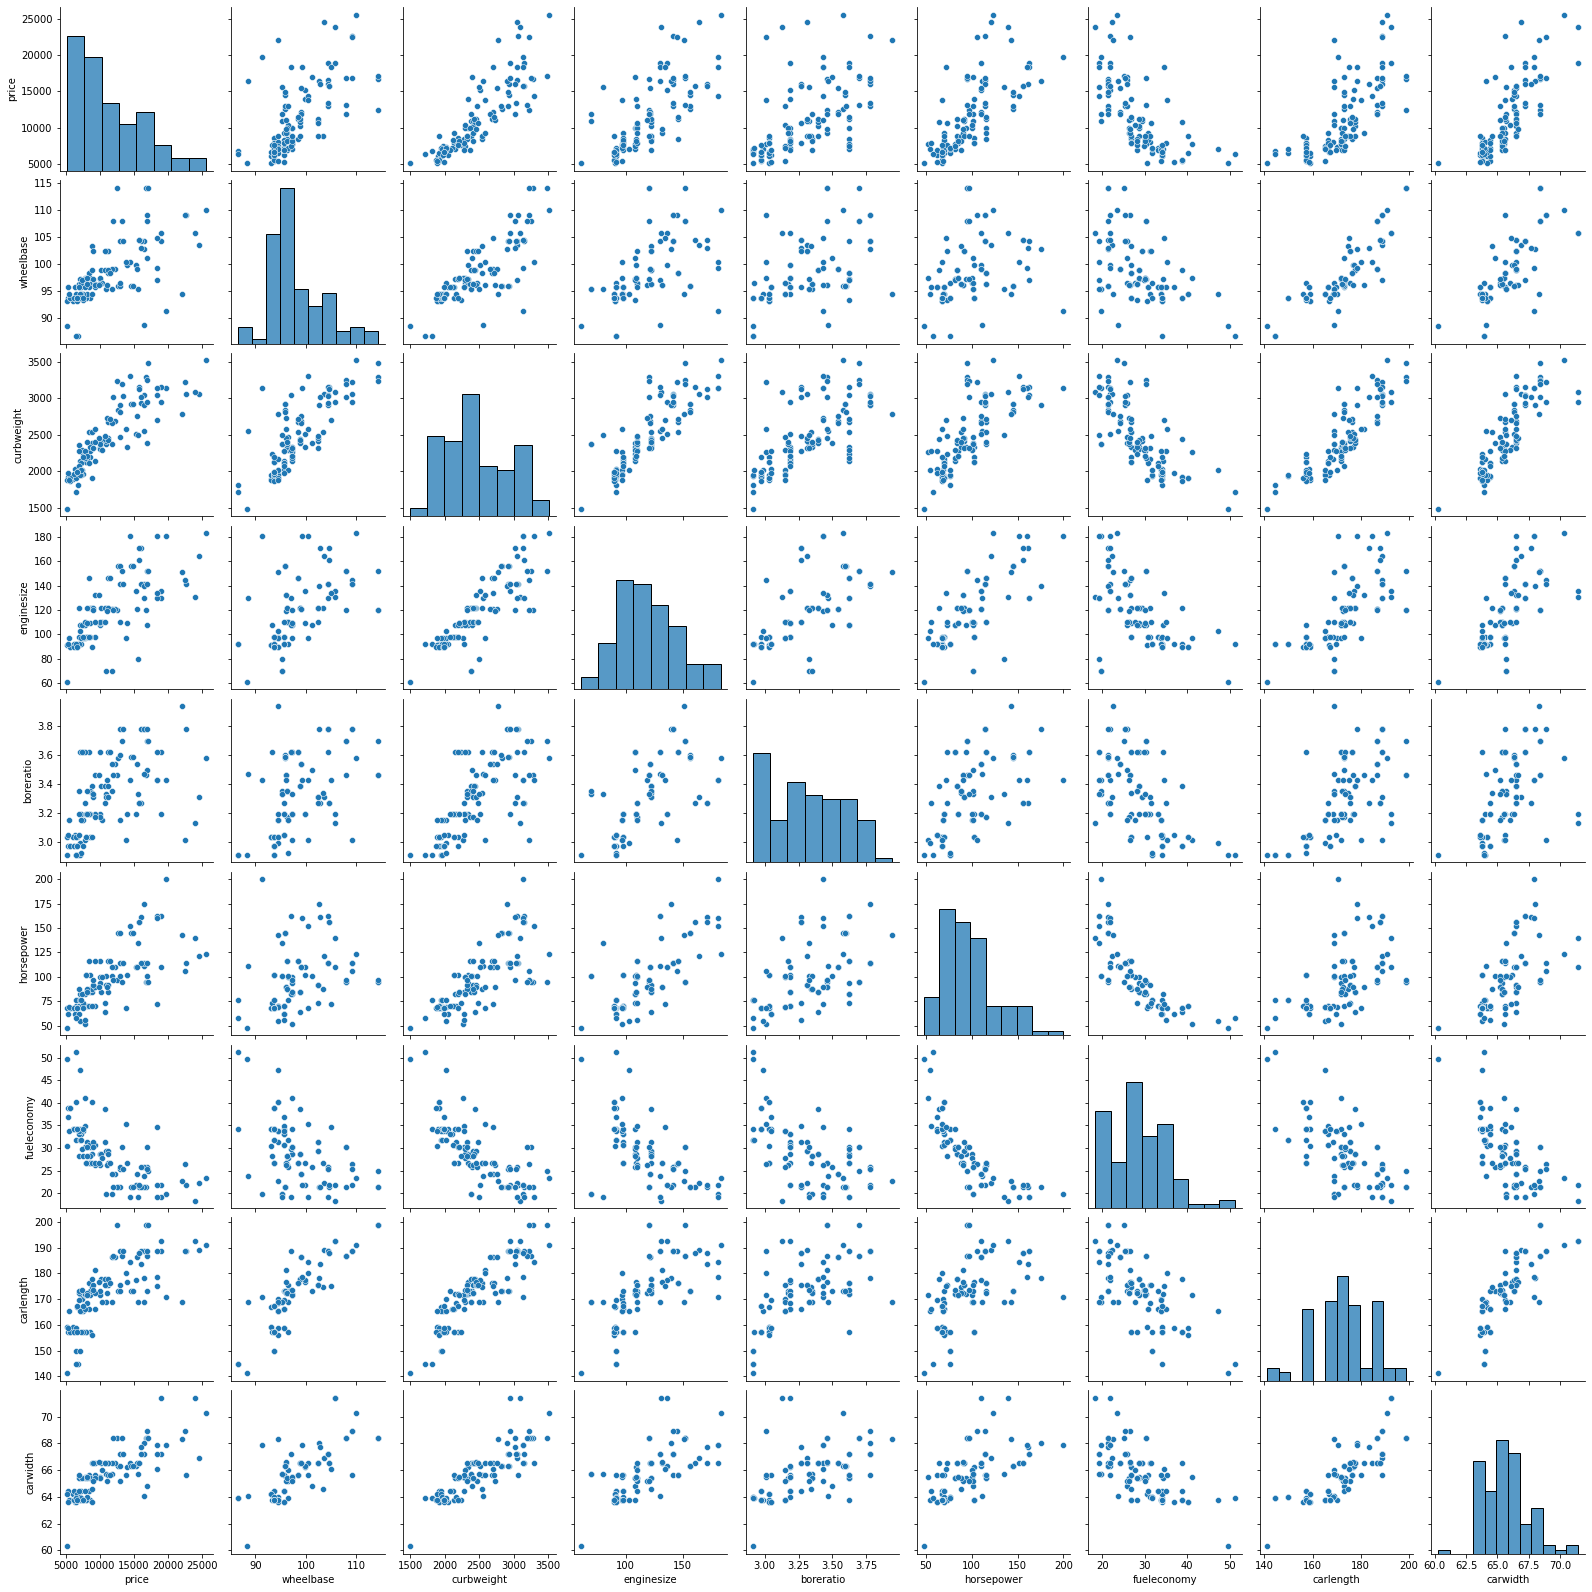

In [53]:
sns.pairplot(cars2)
plt.show()

In [54]:
train.columns

Index(['symboling', 'fueltype', 'CompanyName', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueleconomy'],
      dtype='object')

In [55]:
cars2.columns

Index(['price', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth'],
      dtype='object')

In [56]:
test.columns

Index(['symboling', 'fueltype', 'CompanyName', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [57]:
test.shape

(52, 25)

In [58]:
cars2.shape

(112, 15)

In [59]:
df3=cars2.copy() #actual data

In [62]:
df3.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
0,13950.0,gas,std,sedan,fwd,99.8,2337.0,ohc,four,109,3.19,102,26.70,176.6,66.2
1,16695.0,gas,std,wagon,rwd,114.2,3285.0,l,four,120,3.46,95,21.25,198.9,68.4
2,12629.0,gas,turbo,hatchback,fwd,95.9,2833.0,ohc,four,156,3.58,145,21.25,173.2,66.3
3,6338.0,gas,std,hatchback,fwd,95.7,2040.0,ohc,four,92,3.05,62,34.15,158.7,63.6
6,9960.0,gas,std,sedan,fwd,97.2,2340.0,ohcf,four,108,3.62,94,28.70,172.0,65.4


In [63]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

df3 = dummies('fueltype',df3)
df3 = dummies('aspiration',df3)
df3 = dummies('carbody',df3)
df3 = dummies('drivewheel',df3)
df3 = dummies('enginetype',df3)
df3 = dummies('cylindernumber',df3)


In [64]:
df3.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,l,ohc,ohcf,ohcv,rotor,four,six,three,two
0,13950.0,99.8,2337.0,109,3.19,102,26.70,176.6,66.2,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1,16695.0,114.2,3285.0,120,3.46,95,21.25,198.9,68.4,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0
2,12629.0,95.9,2833.0,156,3.58,145,21.25,173.2,66.3,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
3,6338.0,95.7,2040.0,92,3.05,62,34.15,158.7,63.6,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
6,9960.0,97.2,2340.0,108,3.62,94,28.70,172.0,65.4,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0


In [65]:
cat_var=["gas","turbo","hardtop","hatchback","sedan","wagon","fwd","rwd","l","ohc","ohcf","ohcv","rotor","four","six","three","two"]
num_var=['price','wheelbase',"curbweight","enginesize","boreratio","horsepower","fueleconomy","carlength","carwidth"]
df3[cat_var]=df3[cat_var].apply(lambda x: x.astype('category') )


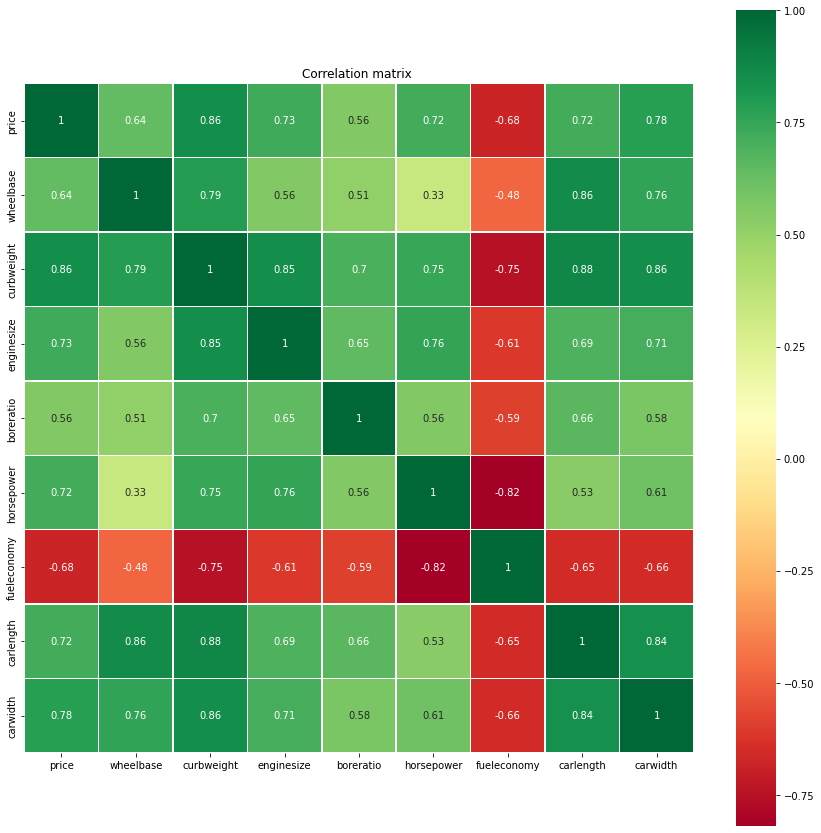

In [66]:
# heatmap using correlation matrix
plt.figure(figsize=(15,15))
_ = sns.heatmap(df3[num_var].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')
# plt.savefig('correlation.png')
plt.show()

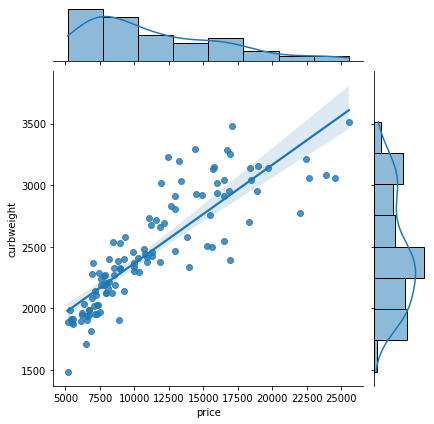

In [67]:
import scipy.stats as stats
_ = sns.jointplot(x='price',y='curbweight',data=df3,kind = 'reg')
_
# plt.savefig('jointct.png')
plt.show()

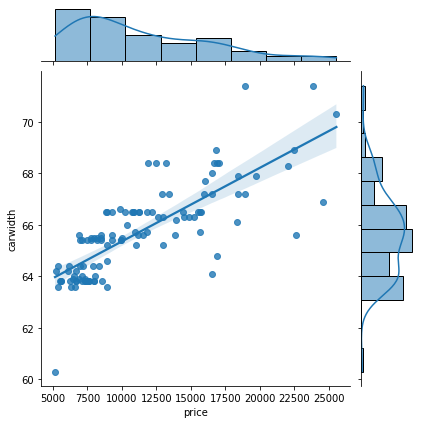

In [68]:

_ = sns.jointplot(x='price',y='carwidth',data=df3,kind = 'reg')

# plt.savefig('jointct.png')
plt.show()

In [69]:
df3.columns

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'gas', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'four', 'six', 'three', 'two'],
      dtype='object')

In [70]:
#Anova
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('price ~ C(gas)+C(turbo)+C(hardtop)+C(hatchback)+C(sedan)+C(wagon)+C(fwd)+C(rwd)+C(l)+C(ohc)+C(ohcf)+C(ohcv)+C(rotor)+C(four)+C(six)+C(three)+C(two)',data=df3).fit()
                
aov_table = sm.stats.anova_lm(model)
aov_table

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,df,sum_sq,mean_sq,F,PR(>F)
C(gas),1.0,1.219856e+08,1.219856e+08,19.620819,2.526690e-05
C(turbo),1.0,3.866272e+08,3.866272e+08,62.187163,5.233100e-12
C(hardtop),1.0,3.180399e+05,3.180399e+05,0.051155,8.215511e-01
C(hatchback),1.0,1.201503e+08,1.201503e+08,19.325606,2.872192e-05
C(sedan),1.0,3.033916e+07,3.033916e+07,4.879912,2.957485e-02
C(wagon),1.0,1.896786e+07,1.896786e+07,3.050890,8.392495e-02
C(fwd),1.0,8.345151e+08,8.345151e+08,134.227844,7.148332e-20
C(rwd),1.0,3.860565e+07,3.860565e+07,6.209538,1.443931e-02
C(l),1.0,6.986021e+07,6.986021e+07,11.236687,1.152447e-03
C(ohc),1.0,3.580886e+02,3.580886e+02,0.000058,9.939606e-01


In [71]:
df3

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,l,ohc,ohcf,ohcv,rotor,four,six,three,two
0,13950.0,99.8,2337.0,109,3.19,102,26.70,176.6,66.2,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1,16695.0,114.2,3285.0,120,3.46,95,21.25,198.9,68.4,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0
2,12629.0,95.9,2833.0,156,3.58,145,21.25,173.2,66.3,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
3,6338.0,95.7,2040.0,92,3.05,62,34.15,158.7,63.6,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
6,9960.0,97.2,2340.0,108,3.62,94,28.70,172.0,65.4,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,8949.0,97.2,2324.0,120,3.33,97,30.15,173.4,65.2,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
149,7609.0,93.7,2191.0,98,2.97,68,34.15,167.3,63.8,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
150,13845.0,100.4,2579.0,97,3.01,68,35.25,180.2,65.6,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
151,11549.0,98.4,2714.0,146,3.62,116,26.70,176.2,65.6,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0


In [ ]:
#df=cars2.copy

In [72]:
df1=df3.copy()

In [73]:
df1_train=df1

In [76]:
df1_train.corr()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
price,1.000000,0.640990,0.856955,0.729359,0.555102,0.721828,-0.679662,0.720604,0.783215
wheelbase,0.640990,1.000000,0.787398,0.555809,0.511220,0.333647,-0.476915,0.860159,0.764593
curbweight,0.856955,0.787398,1.000000,0.853320,0.699616,0.745978,-0.753863,0.880148,0.856126
enginesize,0.729359,0.555809,0.853320,1.000000,0.651477,0.757939,-0.611640,0.688379,0.711146
boreratio,0.555102,0.511220,0.699616,0.651477,1.000000,0.556338,-0.588215,0.660087,0.577802
horsepower,0.721828,0.333647,0.745978,0.757939,0.556338,1.000000,-0.819252,0.531448,0.607380
fueleconomy,-0.679662,-0.476915,-0.753863,-0.611640,-0.588215,-0.819252,1.000000,-0.654474,-0.655791
carlength,0.720604,0.860159,0.880148,0.688379,0.660087,0.531448,-0.654474,1.000000,0.838435
carwidth,0.783215,0.764593,0.856126,0.711146,0.577802,0.607380,-0.655791,0.838435,1.000000


In [77]:
y_train=df1_train.pop("price")
X_train=df1_train

In [78]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=10, verbose=1)
rfe = rfe.fit(X_train, y_train)

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


In [80]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 11),
 ('curbweight', False, 16),
 ('enginesize', False, 13),
 ('boreratio', True, 1),
 ('horsepower', False, 12),
 ('fueleconomy', False, 14),
 ('carlength', False, 15),
 ('carwidth', False, 6),
 ('gas', False, 9),
 ('turbo', True, 1),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 5),
 ('rwd', True, 1),
 ('l', True, 1),
 ('ohc', True, 1),
 ('ohcf', False, 3),
 ('ohcv', False, 4),
 ('rotor', False, 7),
 ('four', True, 1),
 ('six', False, 2),
 ('three', False, 10),
 ('two', False, 8)]

In [81]:
X_train.columns[rfe.support_]

Index(['boreratio', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'rwd',
       'l', 'ohc', 'four'],
      dtype='object')

In [82]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,boreratio,turbo,hardtop,hatchback,sedan,wagon,rwd,l,ohc,four
0,3.19,0,0,0,1,0,0,0,1,1
1,3.46,0,0,0,0,1,1,1,0,1
2,3.58,1,0,1,0,0,0,0,1,1
3,3.05,0,0,1,0,0,0,0,1,1
6,3.62,0,0,0,1,0,0,0,0,1


In [83]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

**MOdel1**

In [105]:
X_train_new2= build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     49.95
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           1.28e-34
Time:                        05:25:12   Log-Likelihood:                -1009.0
No. Observations:                 112   AIC:                             2040.
Df Residuals:                     101   BIC:                             2070.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8180.5159   3727.381     -2.195      0.0

In [106]:
X_train_new2 = X_train_new2.drop(["l"], axis = 1)

In [107]:
X_train_new2 = build_model(X_train_new2,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     54.18
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           6.79e-35
Time:                        05:27:14   Log-Likelihood:                -1010.5
No. Observations:                 112   AIC:                             2041.
Df Residuals:                     102   BIC:                             2068.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7408.7353   3733.256     -1.985      0.0

In [108]:
lm = sm.OLS(y_train,X_train_new2).fit()
y_train_price = lm.predict(X_train_new2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

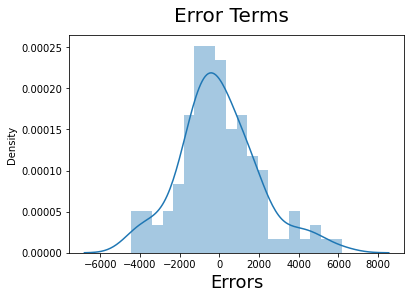

In [109]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [110]:
X_train_new2 = X_train_new2.drop('const',axis=1)

In [112]:
test.head()

,symboling,CompanyName,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,ohc,ohcf,ohcv,rotor,five,four,six,twelve,two
0,2,saab,four,front,99.1,186.6,66.5,56.1,2847,121,mpfi,3.54,3.07,9.0,160,5500,19,26,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
1,3,saab,two,front,99.1,186.6,66.5,56.1,2707,121,mpfi,2.54,2.07,9.3,110,5250,21,28,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,2,subaru,two,front,93.7,157.9,63.6,53.7,2120,108,2bbl,3.62,2.64,8.7,73,4400,26,31,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,1,nissan,two,front,94.5,165.6,63.8,53.3,2028,97,2bbl,3.15,3.29,9.4,69,5200,31,37,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,1,toyota,two,front,94.5,168.7,64.0,52.6,2265,98,mpfi,3.24,3.08,9.4,112,6600,26,29,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [116]:
test.isnull().sum()

symboling           0
CompanyName         0
doornumber          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
gas                 0
turbo               0
hardtop             0
hatchback           0
sedan               0
wagon               0
fwd                 0
rwd                 0
dohcv               0
ohc                 0
ohcf                0
ohcv                0
rotor               0
five                0
four                0
six                 0
twelve              0
two                 0
dtype: int64

In [90]:
test["price"]=test["price"].fillna(0)

In [91]:
y_test = test.pop('price')
X_test = test

In [117]:
X_test_new2= X_test[X_train_new2.columns]

In [118]:
X_test_new2 = sm.add_constant(X_test_new2)

In [119]:
y_pred = lm.predict(X_test_new2)

In [120]:
y_pred

0     10921.095986
1      2182.726087
2      6847.789367
3      7130.260965
4      8656.389119
5     11569.953019
6      8475.323526
7     10716.924808
8     16580.798629
9     14271.477226
10    14994.325859
11     5670.332640
12    16500.000000
13     5670.332640
14     7094.899652
15    20224.865349
16    16580.798629
17    18654.222674
18     8475.323526
19    20337.018373
20    12014.638874
21     7231.822107
22     7946.723832
23     7454.689481
24    20291.354944
25     5670.332640
26     8691.750431
27     9824.000000
28     9317.649600
29     6319.189673
30     8691.750431
31    13318.645690
32     9359.606519
33    26233.832042
34    15389.483495
35    20883.265371
36    17188.830024
37     7130.260965
38    16968.466501
39    18978.651190
40     2682.783738
41     8691.750431
42     6745.179332
43    16580.798629
44    20883.265371
45    10151.678756
46     8427.975031
47    14902.840720
48    10117.520101
49     9082.223640
50     8691.750431
51     9016.178948
dtype: float

In [122]:
prediction=y_pred
#prediction.columns=["prediction"]
#prediction.to_csv("prediction.csv")


In [124]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

12827.458754632808